# Setup Fastai

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

## Create Path to Dataset

In [3]:
path = Path('data')

In [4]:
path.ls()

[PosixPath('data/.DS_Store'),
 PosixPath('data/cardboard'),
 PosixPath('data/cigarette'),
 PosixPath('data/glass'),
 PosixPath('data/metal'),
 PosixPath('data/paper'),
 PosixPath('data/plastic'),
 PosixPath('data/plastic_bag'),
 PosixPath('data/trash')]

## Create Fastai Dataset

In [5]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [6]:
data.classes

['cardboard',
 'cigarette',
 'glass',
 'metal',
 'paper',
 'plastic',
 'plastic_bag',
 'trash']

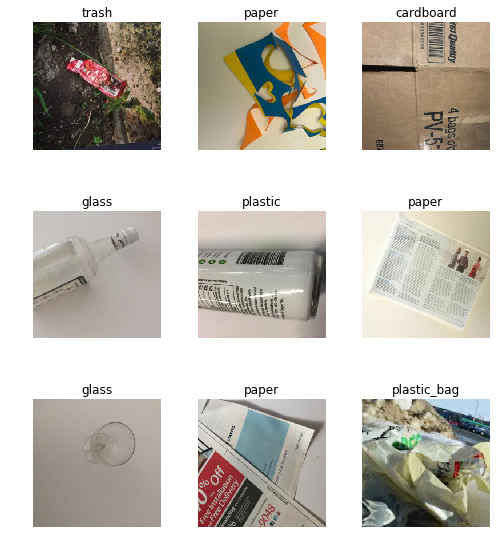

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cardboard',
  'cigarette',
  'glass',
  'metal',
  'paper',
  'plastic',
  'plastic_bag',
  'trash'],
 8,
 2405,
 601)

# Train CNN Model (1st stage)

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.780863,0.643274,0.193012,00:40
1,1.086025,0.487281,0.154742,00:40
2,0.762225,0.460615,0.159734,00:40
3,0.572937,0.449910,0.153078,00:40


In [11]:
learn.save('stage-1')

## Find Optimal Learning Rate

In [12]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


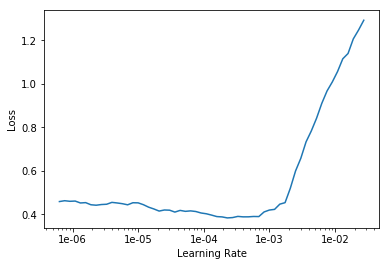

In [14]:
learn.recorder.plot()

# Retrain Model with new Learning Rate (2nd stage)

In [15]:
learn.fit_one_cycle(10, max_lr=slice(1e-5,2e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.421725,0.432357,0.148087,00:42
1,0.381746,0.387727,0.124792,00:43
2,0.333603,0.358228,0.114809,00:45
3,0.276675,0.348191,0.099834,00:45
4,0.219133,0.285274,0.083195,00:45
5,0.179671,0.295085,0.086522,00:46
6,0.140638,0.284841,0.084859,00:46
7,0.120639,0.280772,0.091514,00:45
8,0.100281,0.286396,0.088186,00:46
9,0.088018,0.290366,0.084859,00:44


In [16]:
learn.save('stage-2')

# Interpret and Analyze Model

In [17]:
learn.load('stage-2');

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

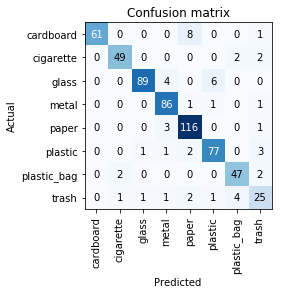

In [19]:
interp.plot_confusion_matrix()

# Test Model with Example Test Image

In [20]:
learn.export()

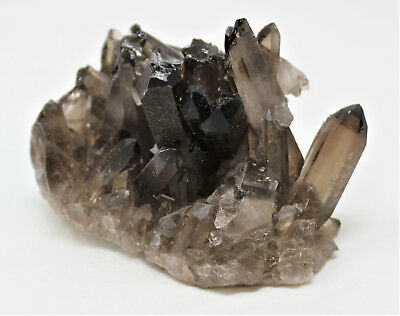

In [20]:
test_img = open_image('./test_data/smoky_q.jpg')
test_img

In [23]:
learn = load_learner(path)

In [25]:
pred_class,pred_idx,outputs = learn.predict(test_img)
pred_class

Category Smoky_Quartz

## Success! :)